In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pycountry as pc
from pprint import pprint
import time


import matplotlib.cm as cm

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.tree import plot_tree
from tqdm import tqdm

import warnings

#sns.set_style(style = 'darkgrid')
warnings.simplefilter('ignore')

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

## import libraries for testing and training our model
import pandas_profiling
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_digits
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [4]:
from pandas.plotting import scatter_matrix
# magic word for producing visualizations in notebook
%matplotlib inline

# helpers
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# estimators
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from scipy.sparse import lil_matrix

# model metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#Scoring Metrics
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import accuracy_score

In [66]:
df = pd.read_csv('/Users/mauricio/Downloads/topMusic1.csv')

In [67]:
df.head(25)

,ID,title,artist,top genre,year,nrgy,dnce,dB,val,dur,pop
0,442,Million Years Ago,Adele,soul,2016,0,0,-60,0,227,0
1,248,Shot Me Down (feat. Skylar Grey) - Radio Edit,David Guetta,pop,2014,77,35,-4,4,191,61
2,341,"Feel The Light - From The ""Home"" Soundtrack",Jennifer Lopez,pop,2015,60,47,-6,4,292,55
3,36,Bound To You - Burlesque Original Motion Pictu...,Christina Aguilera,pop,2010,41,29,-5,7,264,61
4,44,You Lost Me,Christina Aguilera,pop,2010,39,23,-6,7,257,56
5,207,Foolish Games,Jewel,otros,2013,34,51,-11,7,250,36
6,310,Runnin' (Lose It All),Naughty Boy,house,2015,85,32,-6,8,213,69
7,314,I'll Show You,Justin Bieber,pop,2015,61,36,-7,8,200,68
8,351,We Are Here,Alicia Keys,hip pop,2015,67,64,-6,8,285,49
9,359,Run Run Run,Kelly Clarkson,pop,2015,37,28,-7,8,273,36


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         603 non-null    int64 
 1   title      603 non-null    object
 2   artist     603 non-null    object
 3   top genre  603 non-null    object
 4   year       603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   val        603 non-null    int64 
 9   dur        603 non-null    int64 
 10  pop        603 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 51.9+ KB


In [69]:
df.describe()

,ID,year,nrgy,dnce,dB,val,dur,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,301.000000,2014.592040,70.504146,64.379768,-5.578773,52.225539,224.674959,66.520730
std,174.215384,2.607057,16.310664,13.378718,2.798020,22.513020,34.130059,14.517746
min,0.000000,2010.000000,0.000000,0.000000,-60.000000,0.000000,134.000000,0.000000
25%,150.500000,2013.000000,61.000000,57.000000,-6.000000,35.000000,202.000000,60.000000
50%,301.000000,2015.000000,74.000000,66.000000,-5.000000,52.000000,221.000000,69.000000
75%,451.500000,2017.000000,82.000000,73.000000,-4.000000,69.000000,239.500000,76.000000
max,602.000000,2019.000000,98.000000,97.000000,-2.000000,98.000000,424.000000,99.000000


In [70]:
df.shape

(603, 11)

In [71]:
df.isnull()

,ID,title,artist,top genre,year,nrgy,dnce,dB,val,dur,pop
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
598,False,False,False,False,False,False,False,False,False,False,False
599,False,False,False,False,False,False,False,False,False,False,False
600,False,False,False,False,False,False,False,False,False,False,False
601,False,False,False,False,False,False,False,False,False,False,False


In [72]:
df.groupby('nrgy')['artist'].min()

nrgy
0                   Adele
4             John Legend
14                  Birdy
15      A Great Big World
17              Passenger
             ...         
93          Avril Lavigne
94       Enrique Iglesias
95    5 Seconds of Summer
96          Avril Lavigne
98         Jonas Brothers
Name: artist, Length: 77, dtype: object

In [73]:
df.sort_values(by = "nrgy", ascending = False).head(10)

,ID,title,artist,top genre,year,nrgy,dnce,dB,val,dur,pop
579,198,Pom Poms,Jonas Brothers,pop,2013,98,68,-2,90,198,52
224,50,Hello,Martin Solveig,electro,2010,98,67,-3,45,191,0
436,181,Rock N Roll,Avril Lavigne,pop,2013,96,47,-3,67,207,61
596,134,Don't Stop the Party (feat. TJR),Pitbull,pop,2012,96,72,-4,95,206,59
476,430,Blown,DNCE,pop,2016,95,63,-5,73,197,48
340,93,Written in the Stars (feat. Eric Turner),Tinie Tempah,pop,2011,95,64,-4,57,220,52
338,46,Written in the Stars (feat. Eric Turner),Tinie Tempah,pop,2010,95,64,-4,57,220,52
189,328,Booty,Jennifer Lopez,pop,2015,95,71,-4,40,210,64
216,229,She Looks So Perfect,5 Seconds of Summer,pop,2014,95,49,-4,44,202,71
281,200,How Ya Doin'? (feat. Missy Elliott),Little Mix,pop,2013,95,36,-3,51,211,50


In [116]:
df.sort_values(by = "dnce", ascending = False).head(10)

Quieres que sea más(1) o menos(2) bailable?1


In [75]:
df.sort_values(by = "dB", ascending = True).head(10)

,ID,title,artist,top genre,year,nrgy,dnce,dB,val,dur,pop
0,442,Million Years Ago,Adele,soul,2016,0,0,-60,0,227,0
90,431,Start,John Legend,rock,2016,4,52,-15,26,310,47
28,436,Beautiful Birds (feat. Birdy),Passenger,pop,2016,17,39,-13,14,214,36
41,241,Partition,Beyoncé,pop,2014,44,41,-12,17,319,65
70,471,Love,Lana Del Rey,pop,2017,37,53,-11,23,273,72
14,352,St Jude,Florence + The Machine,pop,2015,43,26,-11,9,225,47
503,329,What Do You Mean? - Acoustic,Justin Bieber,pop,2015,36,77,-11,76,204,64
5,207,Foolish Games,Jewel,otros,2013,34,51,-11,7,250,36
452,441,Behind Your Back,Nelly Furtado,latin,2016,47,80,-10,69,228,18
297,364,Love Yourself,Justin Bieber,pop,2016,38,61,-10,52,234,83


In [77]:
df.sort_values(by = "pop", ascending = False).head(10)

,ID,title,artist,top genre,year,nrgy,dnce,dB,val,dur,pop
347,572,Memories,Maroon 5,pop,2019,32,76,-7,57,189,99
16,573,Lose You To Love Me,Selena Gomez,pop,2019,34,51,-9,9,206,97
237,574,Someone You Loved,Lewis Capaldi,pop,2019,41,50,-6,45,182,96
496,575,Señorita,Shawn Mendes,pop,2019,54,76,-6,75,191,95
155,576,How Do You Sleep?,Sam Smith,pop,2019,68,48,-5,35,202,93
279,578,Trampoline (with ZAYN),SHAED,pop,2019,46,62,-6,50,184,92
438,577,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,pop,2019,62,86,-6,67,204,92
199,580,Truth Hurts,Lizzo,otros,2019,62,72,-3,41,173,90
439,579,Happier,Marshmello,electro,2019,79,69,-3,67,214,90
262,581,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,otros,2019,89,67,-3,48,159,90


In [47]:
df.sort_values(by = "bpm", ascending = False).head(10)

,Unnamed: 0.1,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,pop
276,276,277,FourFiveSeconds,Rihanna,barbadian pop,2015,206,27,58,-6,13,35,188,80
362,362,363,L.A.LOVE (la la),Fergie,dance pop,2015,202,39,48,-8,26,27,193,0
200,200,201,How Ya Doin'? (feat. Missy Elliott),Little Mix,dance pop,2013,201,95,36,-3,37,51,211,50
462,462,463,The Greatest,Sia,australian dance,2017,192,73,67,-6,6,73,210,76
314,314,315,I'll Show You,Justin Bieber,canadian pop,2015,192,61,36,-7,18,8,200,68
248,248,249,Shot Me Down (feat. Skylar Grey) - Radio Edit,David Guetta,dance pop,2014,192,77,35,-4,12,4,191,61
288,288,289,Animals,Maroon 5,pop,2015,190,74,28,-6,59,33,231,76
277,277,278,"Love Me Like You Do - From ""Fifty Shades Of Grey""",Ellie Goulding,dance pop,2015,190,61,26,-7,13,28,253,79
469,469,470,Chained To The Rhythm,Katy Perry,dance pop,2017,190,80,45,-5,20,47,238,72
440,440,441,Picky - Remix,Joey Montana,latin,2016,186,81,70,-3,37,69,225,29


In [78]:
df.sort_values(by = "dur", ascending = False).head(10)

,ID,title,artist,top genre,year,nrgy,dnce,dB,val,dur,pop
265,188,TKO,Justin Timberlake,pop,2013,68,61,-7,49,424,58
22,422,Wish That You Were Here - From Miss Peregrine...,Florence + The Machine,pop,2016,57,37,-6,12,403,57
18,63,Monster,Kanye West,rap,2011,69,63,-6,10,379,73
435,162,Lose Yourself to Dance,Daft Punk,electro,2013,66,83,-8,67,354,72
128,194,Take Back the Night,Justin Timberlake,pop,2013,66,59,-5,33,353,54
63,543,Sign of the Times,Harry Styles,pop,2018,57,52,-5,21,341,72
348,48,Castle Walls (feat. Christina Aguilera),T.I.,hip hop,2010,86,45,-5,58,329,49
350,95,Castle Walls (feat. Christina Aguilera),T.I.,hip hop,2011,86,45,-5,58,329,49
159,172,Suit & Tie,Justin Timberlake,pop,2013,60,80,-4,36,326,68
188,256,Drunk in Love,Beyoncé,pop,2014,62,59,-7,40,323,52


In [55]:
df['top genre'].nunique()

50

In [80]:
df[df['top genre'] == 'pop'].sort_values('nrgy', ascending=False).head(10)

,ID,title,artist,top genre,year,nrgy,dnce,dB,val,dur,pop
579,198,Pom Poms,Jonas Brothers,pop,2013,98,68,-2,90,198,52
436,181,Rock N Roll,Avril Lavigne,pop,2013,96,47,-3,67,207,61
596,134,Don't Stop the Party (feat. TJR),Pitbull,pop,2012,96,72,-4,95,206,59
281,200,How Ya Doin'? (feat. Missy Elliott),Little Mix,pop,2013,95,36,-3,51,211,50
338,46,Written in the Stars (feat. Eric Turner),Tinie Tempah,pop,2010,95,64,-4,57,220,52
476,430,Blown,DNCE,pop,2016,95,63,-5,73,197,48
407,24,All The Right Moves,OneRepublic,pop,2010,95,53,-4,65,238,65
216,229,She Looks So Perfect,5 Seconds of Summer,pop,2014,95,49,-4,44,202,71
340,93,Written in the Stars (feat. Eric Turner),Tinie Tempah,pop,2011,95,64,-4,57,220,52
189,328,Booty,Jennifer Lopez,pop,2015,95,71,-4,40,210,64


In [82]:
artista = df.artist
artista.head(10)

0                 Adele
1          David Guetta
2        Jennifer Lopez
3    Christina Aguilera
4    Christina Aguilera
5                 Jewel
6           Naughty Boy
7         Justin Bieber
8           Alicia Keys
9        Kelly Clarkson
Name: artist, dtype: object

In [84]:
generos = df['top genre']
generos.head(10)

0       soul
1        pop
2        pop
3        pop
4        pop
5      otros
6      house
7        pop
8    hip pop
9        pop
Name: top genre, dtype: object

In [ ]:
df.groupby(['top genre']).get_group('pop')

In [103]:
df.groupby(['artist']).max().sort_values(['nrgy','dnce','dB'], ascending= False)

,ID,title,top genre,year,nrgy,dnce,dB,val,dur,pop
artist,,,,,,,,,,
Jonas Brothers,585,Sucker,pop,2019,98,84,-2,95,198,87
Martin Solveig,50,Hello,electro,2010,98,67,-3,45,191,0
Pitbull,503,We Are One (Ole Ola) [The Official 2014 FIFA W...,pop,2017,96,72,-3,95,252,79
Avril Lavigne,181,What the Hell,pop,2013,96,58,-3,88,221,74
Little Mix,494,Touch (feat. Kid Ink),pop,2017,95,85,-3,85,246,77
...,...,...,...,...,...,...,...,...,...,...
Khalid,588,Talk (feat. Disclosure),r&b,2019,40,90,-9,35,198,84
Sleeping At Last,96,Turning Page,pop,2011,38,30,-8,19,255,46
Jewel,207,Foolish Games,otros,2013,34,51,-11,7,250,36


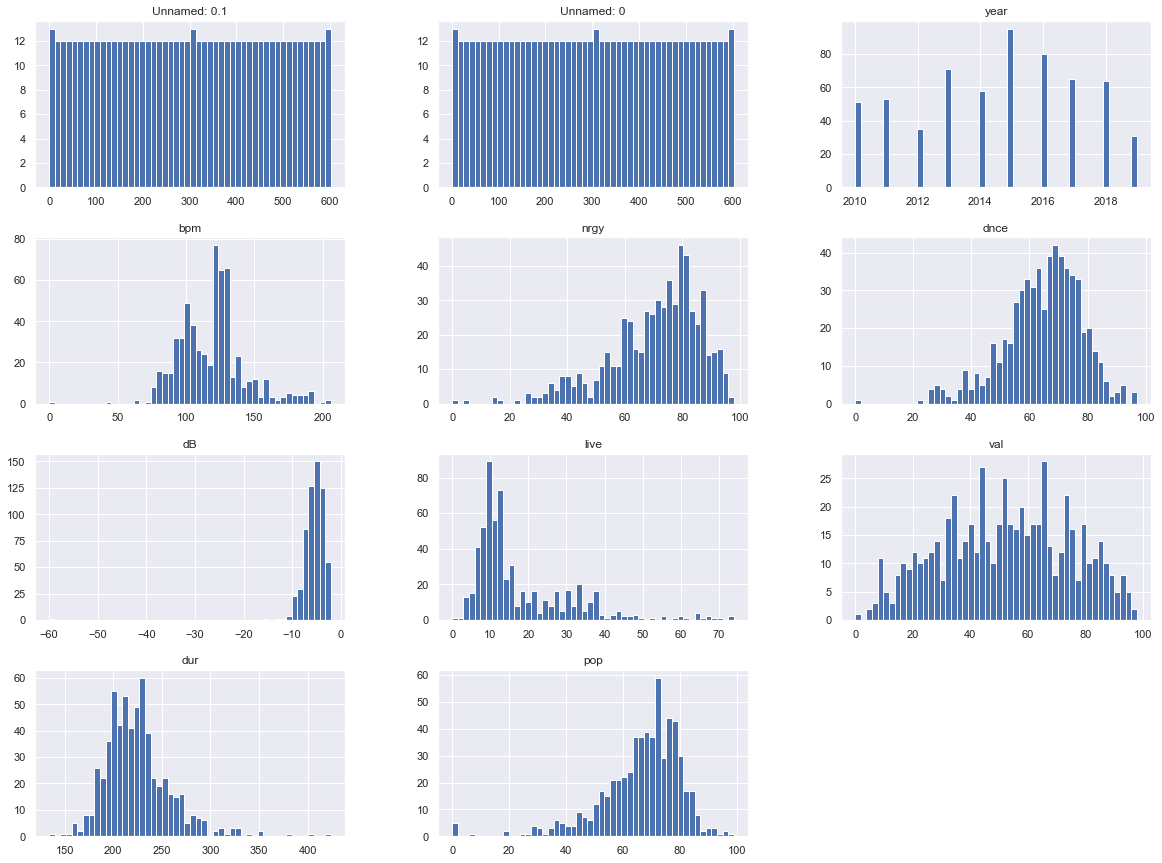

In [23]:
df.hist(bins=50, figsize=(20,15))

plt.show()

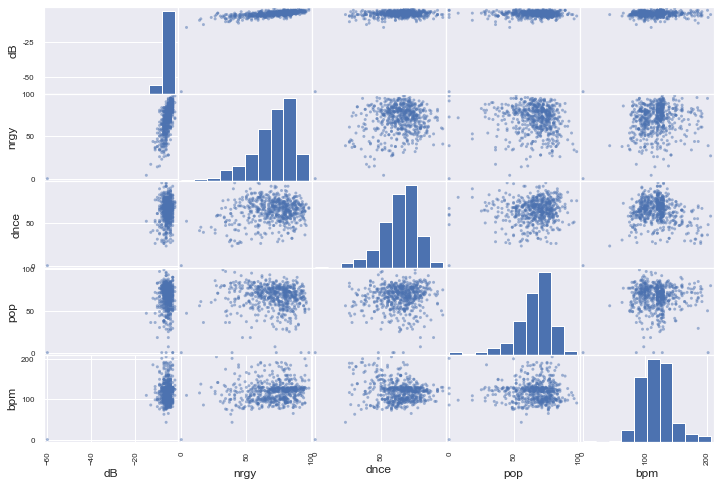

In [46]:
attributes = ['artist','dB', 'nrgy', 'dnce','pop','bpm']
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()